<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_57a_tensorflow_2_0_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0
- Eager execution mode: skip all the Graph and Session (now, becomes much like a simple Python code (numpy code).
- Tensors 1.0
  - Graph: relate the nodes you created
  - Session:class for performing computation on a graph

In [ ]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

## Linear Regression using Tensorflow 2.0

    0|    3.0029|    0.8013|191.921646
   10|    3.9568|     1.755|154.803024
   20|    4.7868|     2.607|125.907997
   30|    5.5089|      3.37|103.397346
   40|    6.1367|     4.053| 85.846344
   50|    6.6825|     4.664| 72.150848
   60|    7.1567|     5.211| 61.454578
   70|    7.5686|     5.701| 53.093197
   80|    7.9262|     6.141| 46.550900
   90|    8.2365|     6.534| 41.426979
  100|    8.5058|     6.887| 37.409897
  110|    8.7392|     7.203| 34.257305
  120|    8.9414|     7.487| 31.780540
  130|    9.1166|     7.742| 29.832596
  140|    9.2682|     7.971| 28.298861
  150|    9.3994|     8.176| 27.089880
  160|    9.5127|      8.36| 26.135777
  170|    9.6107|     8.526| 25.381931
  180|    9.6952|     8.674| 24.785589
  190|    9.7681|     8.808| 24.313271
  200|    9.8310|     8.928| 23.938726
  210|    9.8851|     9.036| 23.641350
  220|    9.9316|     9.133| 23.404949
  230|    9.9716|     9.221| 23.216778
  240|   10.0059|     9.299| 23.066818
  250|   10.0353|      9.

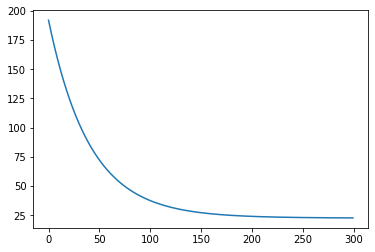

In [ ]:
np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=10, b=10 ???
y = y + np.random.randn(n) * 5       # add noise

W = tf.Variable(2.9)
b = tf.Variable(0.7)

learning_rate = 0.01
lossHistory = []

for i in range(300):
    y_pred = W * x + b
    cost = tf.reduce_mean(tf.square(y_pred - y))

    W_grad = tf.reduce_mean((y_pred - y) * x)
    b_grad = tf.reduce_mean(y_pred - y)
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear Regression using Tensorflow 2.0 (2)
- using tf.GradientTape() for gradient values

    0|    3.1058|    0.9027|191.921646
   10|    4.8755|     2.697|125.586945
   20|    6.2120|     4.132| 85.459198
   30|    7.2198|      5.28| 61.103466
   40|    7.9785|     6.201| 46.266964
   50|    8.5488|     6.939| 37.193863
   60|    8.9765|     7.532| 31.622187
   70|    9.2966|     8.009| 28.185572
   80|    9.5356|     8.392| 26.056047
   90|    9.7135|     8.702| 24.730110
  100|    9.8455|     8.952| 23.900427
  110|    9.9431|     9.153| 23.378635
  120|   10.0149|     9.316| 23.048809
  130|   10.0675|     9.448| 22.839252
  140|   10.1058|     9.555| 22.705442
  150|   10.1335|     9.642| 22.619577
  160|   10.1533|     9.712| 22.564215
  170|   10.1674|     9.769| 22.528349
  180|   10.1773|     9.815| 22.505022
  190|   10.1840|     9.853| 22.489779
  200|   10.1886|     9.884| 22.479782
  210|   10.1916|     9.909| 22.473204
  220|   10.1934|     9.929| 22.468861
  230|   10.1945|     9.946| 22.465981
  240|   10.1950|      9.96| 22.464069
  250|   10.1951|     9.9

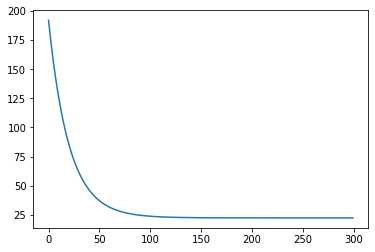

In [ ]:
np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=10, b=10 ???
y = y + np.random.randn(n) * 5       # add noise

W = tf.Variable(2.9)
b = tf.Variable(0.7)

learning_rate = 0.01
lossHistory = []

for i in range(300):
    with tf.GradientTape() as tape:
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))
    
    W_grad, b_grad = tape.gradient(cost, [W,b])  # dCost/dw, dCost/db
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear Regression using Tensorflow 2.0 (3)
- using tf.GradientTape() and optimizer function

    0|    3.0000|       0.8|191.921646
   10|    4.0000|       1.8|153.569397
   20|    5.0000|       2.8|120.200394
   30|    6.0000|       3.8| 91.814590
   40|    7.0000|       4.8| 68.411980
   50|    8.0000|       5.8| 49.992573
   60|    9.0000|       6.8| 36.556351
   70|   10.0000|       7.8| 28.103365
   80|   10.4000|       8.8| 24.187298
   90|   10.2000|       9.8| 22.570364
  100|   10.2000|      10.0| 22.475349
  110|   10.2001|      10.0| 22.475327
  120|   10.2002|      10.0| 22.475307
  130|   10.2003|      10.0| 22.475286
  140|   10.2003|      10.0| 22.475271
  150|   10.2004|      10.0| 22.475248
  160|   10.2005|      10.0| 22.475231
  170|   10.2005|      10.0| 22.475210
  180|   10.2006|      10.0| 22.475193
  190|   10.2007|      10.0| 22.475174
  200|   10.2008|      10.0| 22.475157
  210|   10.2008|      10.0| 22.475136
  220|   10.2009|      10.0| 22.475121
  230|   10.2010|      10.0| 22.475100
  240|   10.2010|      10.0| 22.475086
  250|   10.2011|      10

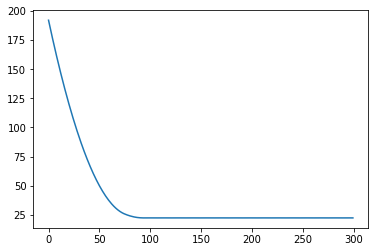

In [ ]:
np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=10, b=10 ???
y = y + np.random.randn(n) * 5       # add noise

W = tf.Variable(2.9)
b = tf.Variable(0.7)

learning_rate = 0.1
lossHistory = []

for i in range(300):
    with tf.GradientTape() as tape:
        y_pred = W * x + b
        cost = tf.reduce_mean(tf.square(y_pred - y))
    
    grads = tape.gradient(cost, [W, b])
    
    optimizer = tf.optimizers.Adam( learning_rate )
    optimizer.apply_gradients(zip(grads, [W,b]))

    lossHistory.append(cost)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear Regression with multi-variables (version 1)

    0|    0.4000|    0.5000|       0.8|327.358063
   50|    5.4000|    5.5000|       5.8| 78.619011
  100|   10.0000|   10.5000|       9.8|  4.109618
  150|   10.0000|   10.4999|       9.8|  4.098044
  200|   10.0000|   10.4998|       9.8|  4.098028
  250|   10.0000|   10.4997|       9.8|  4.098013
  300|   10.0000|   10.4996|       9.8|  4.097998
  350|   10.0000|   10.4995|       9.8|  4.097983
  400|   10.0000|   10.4994|       9.8|  4.097968
  450|   10.0000|   10.4993|       9.8|  4.097954


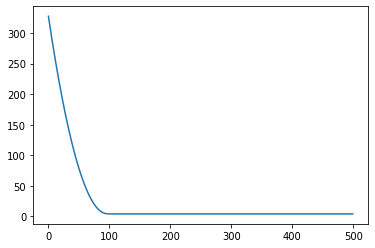

In [ ]:
# two features (x1, x2)
np.random.seed(17) 
n = 100
x1 = np.random.randn(n)
x2 = np.random.randn(n)
y = x1*10 + x2*10 + 10    
y = y + np.random.randn(n) * 2 

w1, w2, b = tf.Variable(0.3), tf.Variable(0.4), tf.Variable(0.7)
learning_rate = 0.1
lossHistory = []

for i in range(500):
    with tf.GradientTape() as tape:
        y_pred = x1 * w1 + x2 * w2 + b
        cost = tf.reduce_mean(tf.square(y_pred - y))
    
    optimizer = tf.optimizers.Adam( learning_rate )
    grads = tape.gradient(cost, [w1, w2, b])
   
    optimizer.apply_gradients(zip(grads, [w1, w2, b]))

    lossHistory.append(cost)
    if i % 50 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.4}|{:10.6f}".format(i, w1.numpy(), w2.numpy(), b.numpy(), cost))

plt.plot(lossHistory)

## Linear Regression with multi-variables (version 2)

0 [[-0.35593605]
 [ 0.8028318 ]] [0.2691186] tf.Tensor(323.7153, shape=(), dtype=float32)
50 [[4.6440616]
 [5.8028283]] [5.2691154] tf.Tensor(82.22462, shape=(), dtype=float32)
100 [[9.644056]
 [9.802825]] [9.869101] tf.Tensor(4.7523575, shape=(), dtype=float32)
150 [[10.243821]
 [ 9.802841]] [9.669115] tf.Tensor(4.2629695, shape=(), dtype=float32)
200 [[10.243569]
 [ 9.802865]] [9.669067] tf.Tensor(4.262915, shape=(), dtype=float32)
250 [[10.243331]
 [ 9.802889]] [9.66902] tf.Tensor(4.2628627, shape=(), dtype=float32)


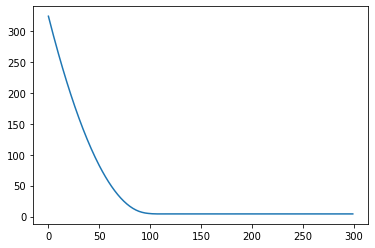

In [ ]:
# matrix form
np.random.seed(17) 
n = 100
X = np.random.randn(n,2).astype('float32')
y = X[:,0]*10 + X[:,1]*10 + 10    
y = y + np.random.randn(n) * 2 
y = y.reshape(-1,1)

W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

learning_rate = 0.1
lossHistory = []

for i in range(300):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        # y_pred = X[:,0] * W[0,0] + X[:,1] * W[1,0] + b  # wrong!
        cost = tf.reduce_mean(tf.square(y_pred - y))
    
    optimizer = tf.optimizers.Adam( learning_rate )
    grads = tape.gradient(cost, [W, b])
   
    optimizer.apply_gradients(zip(grads, [W,b]))

    lossHistory.append(cost)
    if i % 50 == 0:
        print(i, W.numpy(), b.numpy(), cost)

plt.plot(lossHistory)

In [ ]:
# tf.mult
x = tf.constant([[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]])
y = tf.constant([[0],[0],[0],[1],[1],[1]])
w = tf.Variable([[3],[4]])
b = tf.Variable([2])
print(x.shape, y.shape, w.shape, b.shape)
m1 = tf.matmul(x, w) + b
print(m1, m1.shape, tf.reduce_mean(m1))

###
m2 = x[:,0] * w[0,0] + x[:,1] * w[1,0] + b
print(m2, m2.shape, tf.reduce_mean(m2))

(6, 2) (6, 1) (2, 1) (1,)
tf.Tensor(
[[13]
 [20]
 [15]
 [26]
 [29]
 [28]], shape=(6, 1), dtype=int32) (6, 1) tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor([13 20 15 26 29 28], shape=(6,), dtype=int32) (6,) tf.Tensor(21, shape=(), dtype=int32)


## Linear regression using keras

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[10.050897]], dtype=float32), array([9.995196], dtype=float32)]


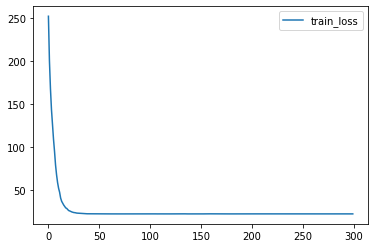

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import SGD

np.random.seed(17) 
n = 100
x = np.random.randn(n)                # batch size
y = x*10 + 10                         # w=20, b=10 ???
y = y + np.random.randn(n) * 5       # add noise

#---------
model = Sequential()

model.add(Dense(1, input_shape=(1,), activation='linear'))
model.summary()

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

history = model.fit(x, y, epochs=300, verbose=0)

print([i.numpy() for i in model.weights])
# history.history.keys()
plt.plot(history.history['loss'], label='train_loss')
plt.legend(loc='best')

## Logistic regression (with Tensorflow)

(300, 2) (300, 1)
0 0.88869387 -2.2222676 [0.72248536] 3.6633794
20 1.4285843 -1.7234483 [0.79455024] 0.6419337
40 1.6146446 -1.5132736 [0.82168806] 0.18265592
60 1.6938438 -1.4163157 [0.83351415] 0.09614641
80 1.7366115 -1.3642066 [0.8393859] 0.07160041
100 1.7625387 -1.3345318 [0.84225386] 0.06331242
120 1.7795318 -1.317293 [0.84344035] 0.060213145
140 1.7914066 -1.3073658 [0.843632] 0.058955643
160 1.8002083 -1.3018909 [0.8432155] 0.058394656
180 1.8071094 -1.2991861 [0.84242] 0.058107674


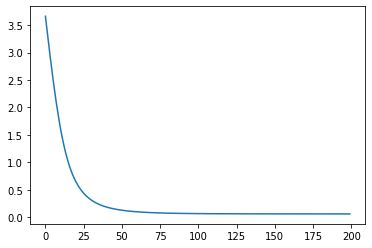

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(17)
(X, y) = make_blobs(n_samples=300, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=20)
X = X.astype('float32')  
y = y.reshape(-1,1)
print(X.shape, y.shape)

W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

learning_rate = 0.01
lossHistory = []

for i in range(200):
    with tf.GradientTape() as tape:
        z = tf.matmul(X, W) + b
        y_pred = tf.math.divide(1., 1. + tf.exp(-z))
        y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
        loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))
    
    grads = tape.gradient(loss, [W, b])
    optimizer = tf.optimizers.SGD( learning_rate )
    optimizer.apply_gradients(zip(grads, [W, b]))

    lossHistory.append(loss)
    if i % 20 == 0:
        print(i, W[0,0].numpy(), W[1,0].numpy(), b.numpy(), loss.numpy())

plt.plot(lossHistory)

[]

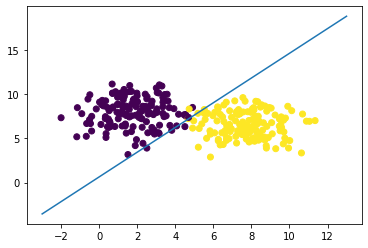

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y)
aa, bb, cc = W[0,0], W[1,0], b
xx = np.linspace(-3, 13, 100)
plt.plot (xx, -aa/bb * xx - cc/bb)
plt.plot()

## Logistic Regression (by batches)

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.3734399],
       [ 1.1627666]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([1.8181605], dtype=float32)>
step:  0 -0.44790182 0.7706896 [1.7697136] 3.9616532
step:  5 0.03212547 -0.21589856 [1.6683302] 0.60007364
step:  10 0.34632283 -0.4326025 [1.6455218] 0.25866434
step:  15 0.5069758 -0.53932935 [1.6311882] 0.20406142


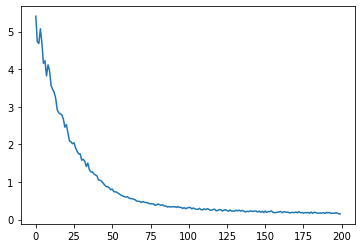

In [ ]:
(X, y) = make_blobs(n_samples=3000, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=20)
X, y = X.astype('float32'), y.reshape(-1,1).astype('float32')
dataset = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(500).batch(300)

W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
print (W, b)
#---------------------
num_epochs = 20
learning_rate = 0.01

def logistic_regression(X):
    z = tf.matmul(X, W) + b
    return 1. / (1. + tf.exp(-z))

def loss_fn(y_pred, Y):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_mean(Y * tf.math.log(y_pred) + (1 - Y) * tf.math.log(1 - y_pred))

lossHistory = []
for step in range(num_epochs):
    for batch_x, batch_y in iter(dataset):
        with tf.GradientTape() as tape:
            y_pred = logistic_regression(batch_x)
            loss = loss_fn(y_pred, batch_y)

        grads = tape.gradient(loss, [W, b])
        optimizer = tf.optimizers.SGD( learning_rate )
        optimizer.apply_gradients(zip(grads, [W,b]))
        lossHistory.append(loss)
    if step%5 == 0:
        print("step: ", step, W[0,0].numpy(), W[1,0].numpy(), b.numpy(), loss.numpy())
        
plt.plot(lossHistory)

[]

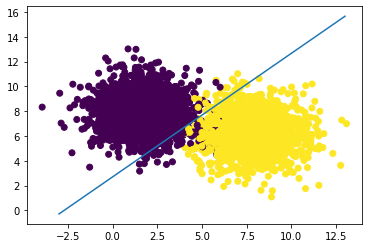

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y)
aa, bb, cc = W[0,0], W[1,0], b
xx = np.linspace(-3, 13, 100)
plt.plot (xx, -aa/bb * xx - cc/bb)
plt.plot()

## Logistic regression (with Keras)

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(17)
N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=20)

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=0)

print([i.numpy() for i in model.weights])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[array([[ 1.624783 ],
       [-1.0142055]], dtype=float32), array([-0.27355838], dtype=float32)]


In [ ]:
model.weights[0].shape, model.weights[1].shape

(TensorShape([2, 1]), TensorShape([1]))

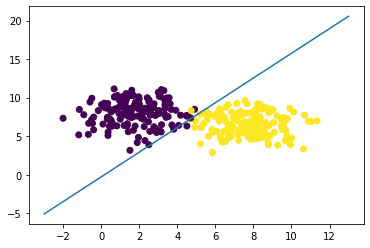

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
w1, w2 = model.weights[0][0,0], model.weights[0][1,0]
b = model.weights[1]
xx = np.linspace(-3, 13, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)

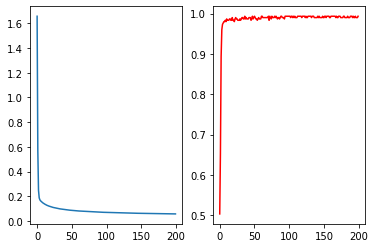

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy', c='r')
plt.show()

# Tf1.0 and Tf 2.0 비교


### 1. Eager execution (no Graph, no Session)
 - direct execution
 - no placeholder(), no gloval_variables_initializer()

In [ ]:
a = tf.constant(10)
b = tf.constant(20)
c = a + b
print(c, c.numpy())

tf.Tensor(30, shape=(), dtype=int32) 30


In [ ]:
w = tf.Variable(tf.random.normal([1]))
print(w)

for step in range(3):
    w = w + 100.0
    print(w.numpy())

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.24264038], dtype=float32)>
[100.24264]
[200.24265]
[300.24265]


In [ ]:
a = tf.constant(1.0)   # function 에 직접 값을 넘겨줄 수 있음.
b = tf.constant(3.0)

def tensor_sum(x, y):
    return x + y

result = tensor_sum(a, b)

print(type(result), result, result.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(4.0, shape=(), dtype=float32) 4.0


### 2. high level API (keras)
- model, layers
- data generation (train, test)
- CNN, RNN, LSTM, GRU, ... 
- model generation -> compile -> fit -> evaluate/predict -> save (or reload)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
model = Sequential()

model.add(Flatten(input_shape=(1,)))
model.add(Dense(2, activation='sigmoid'))
# or
# model.add(Dense(2, activation='sigmoid'), input_shape=(1,)) # more common
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import SGD, Adam
# regression
model.compile(optimizer=SGD(learning_rate=0.1), 
              loss='mse',
              metrics=['accuracy'])    # loss 는 기본
# classification
model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
'''
model.fit(x_train, y_train, epochs=10, 
          batxh_size=100,
          verbose=0,
          validation_split=0.2)

model.evaluate(x_test, y_test, epochs=10, batch_size=10)
model.predict(x_input_data, batch_size=100)
'''

'\nmodel.fit(x_train, y_train, epochs=10, \n          batxh_size=100,\n          verbose=0,\n          validation_split=0.2)\n\nmodel.evaluate(x_test, y_test, epochs=10, batch_size=10)\nmodel.predict(x_input_data, batch_size=100)\n'

In [ ]:
'''
model.save("model_name.h5")
# and later
model = load_model("model_name.h5")
'''

'\nmodel.save("model_name.h5")\n# and later\nmodel = load_model("model_name.h5")\n'

#### input_shape and input_dim
- Input shape: simply tells the input layer what the shape of one sample looks like. Adding it to your input layer, will ensure that a match is made.

- Input dim: sometimes, though, you just have one dimension – which is the case with one-dimensional / flattened arrays, for example. In this case, you can also simply use input_dim: specifying the number of elements within that first dimension only.

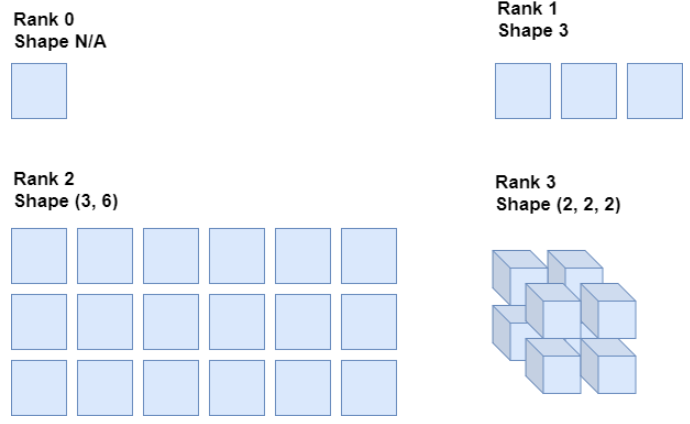

# 연습
- GradientTape(): 
  - trainable variables (created by tf.Variable or tf.compat.v1.get_variable, where trainable=True is default in both cases) are automatically watched. Tensors can be manually watched by invoking the watch method on this context manager.
  - By default GradientTape will automatically watch any trainable variables that are accessed inside the context
- 

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y

dz_dx = g.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = g.gradient(y, x)  # 6.0
# del g  # Drop the reference to the tape

dz_dx, dy_dx


(<tf.Tensor: shape=(), dtype=float32, numpy=108.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [ ]:
# zip
Number = [1,2,3,4]
Name = ['hong','gil','dong','nim']
dic = {}
for number , name in zip(Number,Name): 
    dic[number] = name
print(dic)
# or 
list(zip(Number, Name))

{1: 'hong', 2: 'gil', 3: 'dong', 4: 'nim'}


[(1, 'hong'), (2, 'gil'), (3, 'dong'), (4, 'nim')]

In [ ]:
z = zip(Number, Name)

In [ ]:
next(z)   # try one at a time

(3, 'dong')

In [ ]:
[(i,j) for i,j in zip(Number, Name)]

[(1, 'hong'), (2, 'gil'), (3, 'dong'), (4, 'nim')]

In [ ]:
x = 21
y = 3
zip(x, y)

TypeError: ignored

In [ ]:
x = [21]
y = [3]
zip(x, y)

In [ ]:
t1 = tf.constant([1,2,3])
t2 = tf.Variable([1,2,3])
n1 = [1,2,3]
t1, t2

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>)

In [ ]:
[(i.numpy(),j) for i, j in zip(t1,n1)]

[(1, 1), (2, 2), (3, 3)]

In [ ]:
zip(t2,n1)

TypeError: ignored

In [ ]:
t3 = tf.Variable(tf.random.normal([3,1]))
t4 = tf.Variable(tf.random.normal([1]))
variables = [t3, t4]
t3, t4, variables

(<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.84865147],
        [-0.28332502],
        [ 0.31476352]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.1826072], dtype=float32)>,
 [<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
  array([[ 0.84865147],
         [-0.28332502],
         [ 0.31476352]], dtype=float32)>,
  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.1826072], dtype=float32)>])

In [ ]:
[(i, j) for i, j in zip([t4,t4], [t4, t4])]

[(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.1826072], dtype=float32)>,
  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.1826072], dtype=float32)>),
 (<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.1826072], dtype=float32)>,
  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.1826072], dtype=float32)>)]